In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

In [35]:
# read dataset from a Google Drive File

file_link = 'https://drive.google.com/file/d/1Nsyp-huFIzEPBiqD6H1vNzo7HORcrJmi/view?usp=sharing' # the file access must have to be Public

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
data = pd.read_csv(new_link)

# let's look at the first few instances
data.head(10)

,X1,X2
0,6.21,5.99
1,6.16,5.65
2,4.70,3.48
3,4.21,2.55
4,4.03,2.77
5,4.96,2.93
6,6.39,5.25
7,6.69,6.19
8,4.31,2.91
9,7.53,6.91


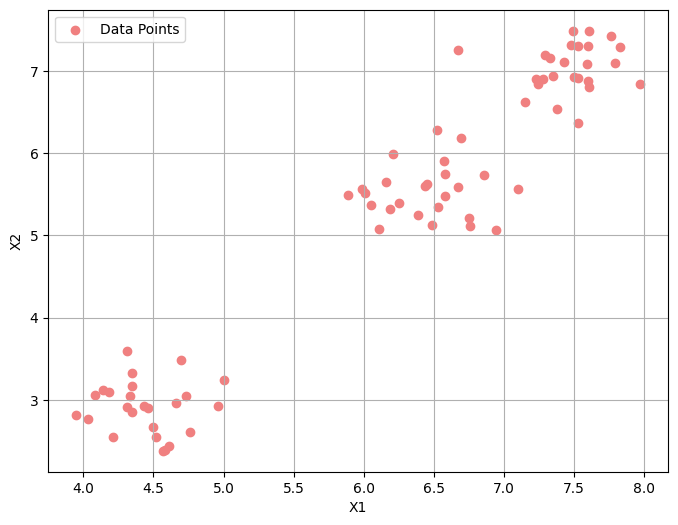

In [36]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], c='lightcoral', label='Data Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

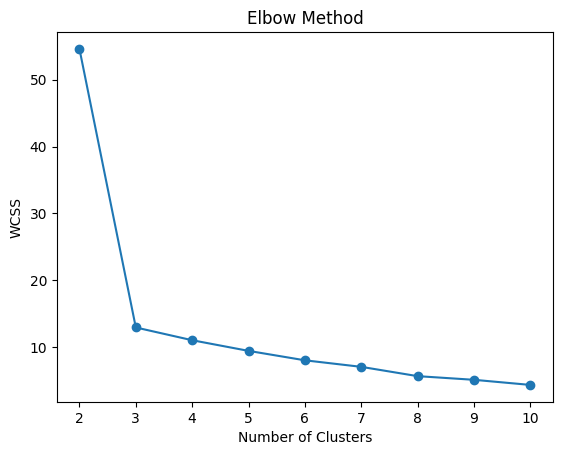

In [37]:
# Finding the Optimal Value of K (Elbow Method)
wcss = [] # Within-Cluster Sum of Square
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 200, random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

[[4.4428 2.9136]
 [6.4472 5.5284]
 [7.4708 7.0404]]
[1 1 0 0 0 0 1 1 0 2 2 2 1 0 0 1 2 0 2 0 2 1 2 1 2 1 1 0 1 2 2 0 1 2 2 2 1
 2 2 2 1 2 1 2 2 0 0 1 1 0 0 0 0 0 2 0 0 1 0 1 1 2 1 0 2 1 1 0 0 2 2 1 2 1
 0]


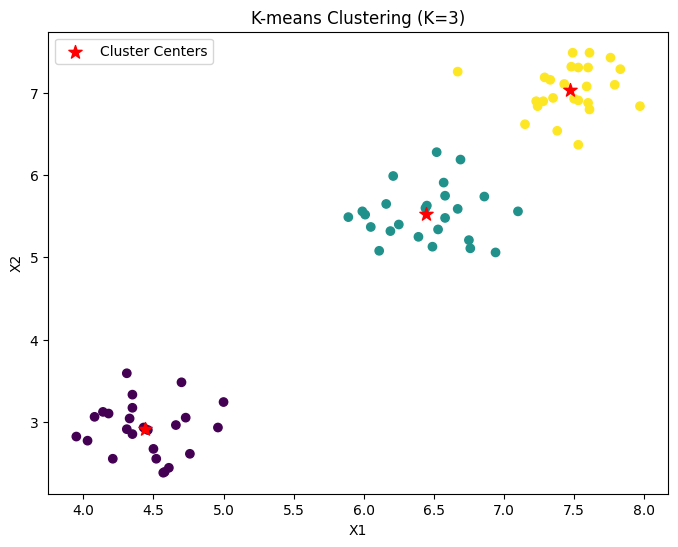

In [38]:
# Apply K-means with K = 3
K = 3
kmeans = KMeans(n_clusters = K, init = 'random', max_iter = 200, random_state = 42)
kmeans.fit(data)

# Get Cluster Centers and Labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
print(cluster_centers)
print(labels)

# Plot the Clustered Data
plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=100, c='red', label='Cluster Centers')
plt.title('K-means Clustering (K=3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
# plt.grid(True)
plt.show()

Cluster Centroids:
 [[4.4428 2.9136]
 [6.4472 5.5284]
 [7.4708 7.0404]]
Cluster Labels:
 [1 1 0 0 0 0 1 1 0 2 2 2 1 0 0 1 2 0 2 0 2 1 2 1 2 1 1 0 1 2 2 0 1 2 2 2 1
 2 2 2 1 2 1 2 2 0 0 1 1 0 0 0 0 0 2 0 0 1 0 1 1 2 1 0 2 1 1 0 0 2 2 1 2 1
 0]


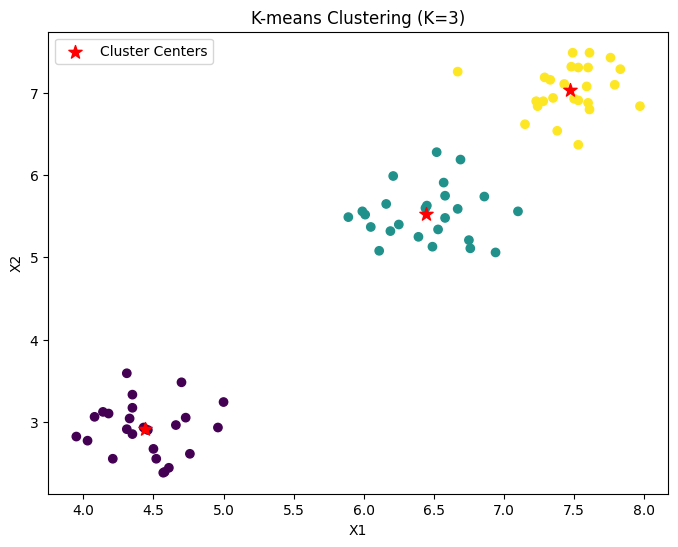

In [43]:
# Now implement the same thing from Scratch
import random
import math

def euclidean_distance(centroid, dataPoint):
    ### Your Code Here ###
    return math.sqrt(((centroid[0] - dataPoint[0])**2)+((centroid[1] - dataPoint[1])**2))

def manhattan_distance(centroid, dataPoint):
    ### Your Code Here ###
    return (abs(centroid[0] - dataPoint[0]) + abs(centroid[1] - dataPoint[1]))

def kmeans_fit(dataset, k, distance = 'euclidean', max_iterations = 100):
    ### Your Code Here ###
    labels = np.zeros(len(data), dtype=int)

    # Initialize k centroids randomly
    centroids = np.zeros((k, 2), dtype = float)
    indexes = []
    for centroid_i in range(k):
      index = random.randint(0, len(dataset)-1)
      while index in indexes:
        index = random.randint(0, len(dataset)-1)
      indexes.append(index)
      centroids[centroid_i][0], centroids[centroid_i][1] = dataset['X1'][index], dataset['X2'][index]

    for iteration_count in range(max_iterations):  # Loop till max_iterations
      new_centroids = np.zeros((k, 2), dtype = float)
      data_count = np.zeros(k)

      # Assign each data point to the nearest centroid by calculating the distance
      for data_i in range(len(dataset)):
        distances = np.zeros(k)
        for distance_i in range(k):  # for every centroid - calculating distance
          if distance == 'euclidean':
            distances[distance_i] = euclidean_distance((centroids[distance_i][0], centroids[distance_i][1]), (dataset['X1'][data_i], dataset['X2'][data_i]))
          elif distance == 'manhattan':
            distances[distance_i] = manhattan_distance((centroids[distance_i][0], centroids[distance_i][1]), (dataset['X1'][data_i], dataset['X2'][data_i]))

        # Store the assigned labels
        cluster_no = np.argmin(distances)
        labels[data_i] = cluster_no
        new_centroids[cluster_no][0] += dataset['X1'][data_i]  # added X
        new_centroids[cluster_no][1] += dataset['X2'][data_i]  # added Y
        data_count[cluster_no] += 1

      # Update the centroids based on the mean of the points assigned to each cluster
      for cluster_i in range(k):
        new_centroids[cluster_i] /= data_count[cluster_i]

      if np.array_equal(centroids, new_centroids):  # centroids didnt change
        break
      else:
        centroids = new_centroids

    return centroids, labels

# Apply K-Means from scratch with K = 3
centroids, labels = kmeans_fit(data, k = 3, distance = 'manhattan', max_iterations = 200)

# Print centroids and labels
print("Cluster Centroids:\n", centroids)
print("Cluster Labels:\n", labels)

# Lastly, Plot the Clustered Data

### Your Code Here ###

plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='red', label='Cluster Centers')
plt.title('K-means Clustering (K=3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
# plt.grid(True)
plt.show()